In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(1)

In [11]:
max_len = 5

def generate_segment(start_x: int, end_x: int, start_y: int = 0, end_y: int = 50):
    first_x, first_y = start_x + (end_x - start_x) * random.random(), start_y + (end_y - start_y) * random.random()
    end_x = first_x + max_len * random.random()
    end_y = first_y + (max_len**2 - (end_x - first_x)**2)**(0.5) * random.choice((-1, 1))
    return first_x, first_y, end_x, end_y


def generate_segments(num_segments: int, num_ranges: int,
                      start_x: int = 0, start_y: int = 0,
                      end_x: int = 100, end_y: int = 50):
    x_ratio = end_x - start_x
    segments = []

    range_len = x_ratio // num_ranges

    borders_non_overlapping = [start_x + ind * range_len for ind in range(num_ranges)] + [end_x]
    borders_overlapping = [start_x + range_len // 2 + ind * range_len for ind in range(num_ranges)]
    for ind in range(num_ranges):
        segments.extend([generate_segment(borders_non_overlapping[ind], borders_non_overlapping[ind + 1]) for seg in range(num_segments)])


    for ind in range(num_ranges - 1):
        segments.extend([generate_segment(borders_overlapping[ind], borders_overlapping[ind + 1]) for seg in range(num_segments)])

    return segments

In [3]:
def visualize_segments(segments: list):
    fig = plt.figure(figsize=(20, 10))
    for segment in segments:
        plt.plot((segment[0], segment[2]), (segment[1], segment[3]), linestyle="-")

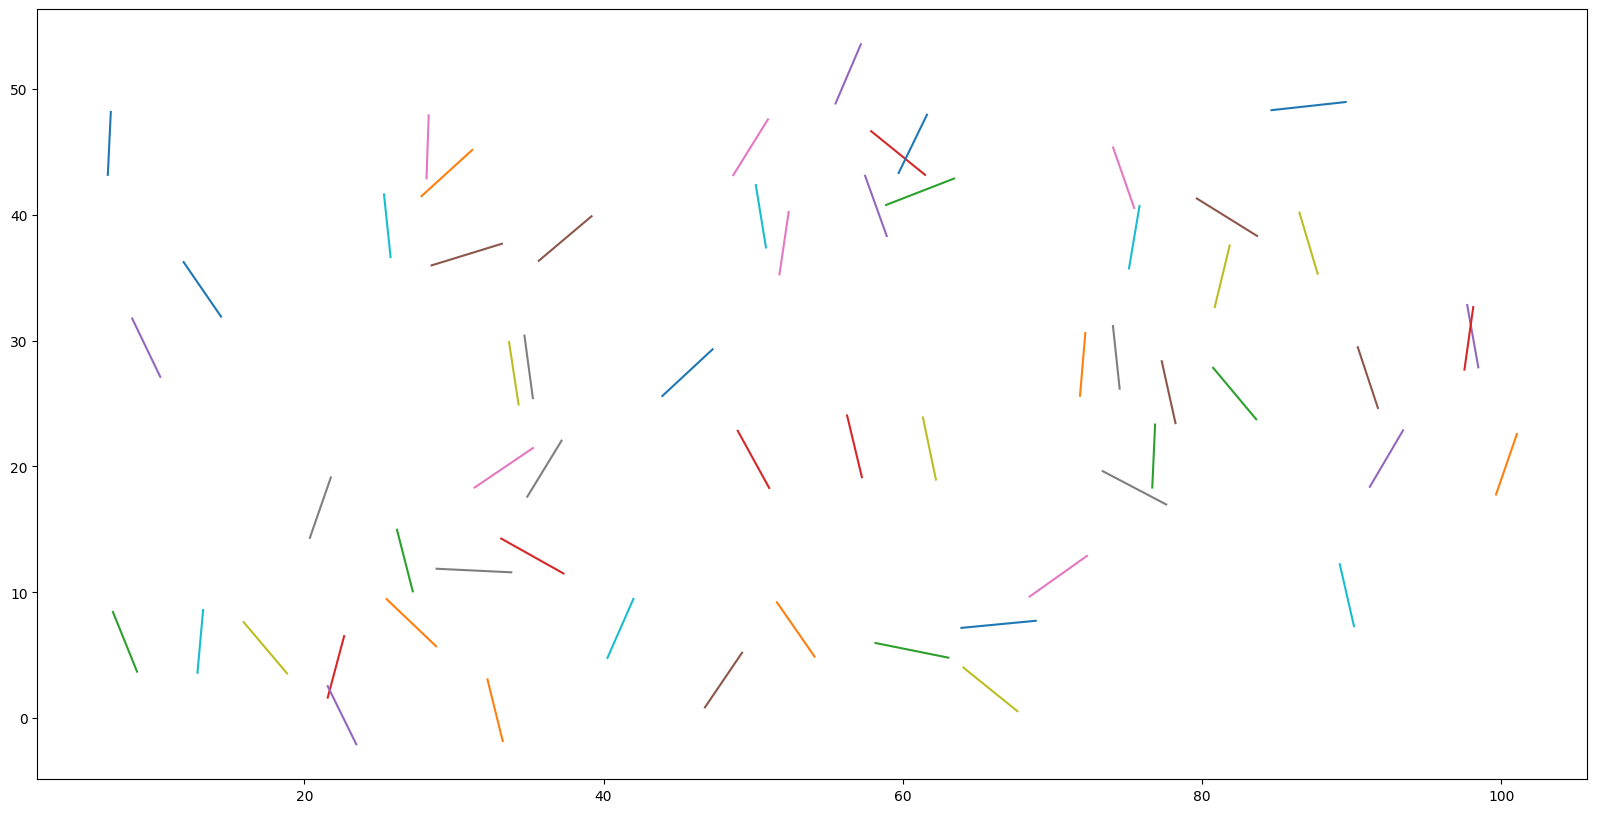

In [22]:
segments = generate_segments(12, 3)
visualize_segments(segments)

In [7]:
def to_cpp_code(segments):
    code_str = 'std::vector<Segment> segments = {'
    offset_len = len(code_str)
    is_first = True
    for segment in segments:
        segment_str = (' ' * offset_len if not is_first else '') + f'Segment(Point({segment[0]}, {segment[1]}), Point({segment[2]}, {segment[3]})),\n'
        code_str += segment_str
        is_first = False
    code_str = code_str[:-2] + '};'
    return code_str

In [24]:
print(to_cpp_code(segments))

std::vector<Segment> segments = {Segment(Point(11.93524716859276, 36.241718111755425), Point(14.436646523263096, 31.912399312168723)),
                                 Segment(Point(25.502321730327374, 9.46363603215621), Point(28.811238605375397, 5.715160460137309)),
                                 Segment(Point(7.213446424135197, 8.436266980396335), Point(8.823791006172996, 3.702685849043297)),
                                 Segment(Point(21.567834625340726, 1.641355309073761), Point(22.663515867534144, 6.519826649104928)),
                                 Segment(Point(8.498002618590318, 31.760935955238306), Point(10.375586220727573, 27.126857857386987)),
                                 Segment(Point(28.510413446103758, 35.97950544098956), Point(33.206034706975714, 37.69739396311411)),
                                 Segment(Point(31.3854905373413, 18.327554466463475), Point(35.27932529432366, 21.46412120181538)),
                                 Segment(Point(20.37475712249952,